# Simulation of Prices of Coupon-Bearing Bonds using CIR

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [12]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [6]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [14]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    109.979004
2    108.069296
3    110.552078
dtype: float64

In [13]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.028559,0.032493,0.027394
2,0.032256,0.030546,0.026045
3,0.029696,0.032149,0.024988
4,0.030161,0.031550,0.027890


<AxesSubplot:>

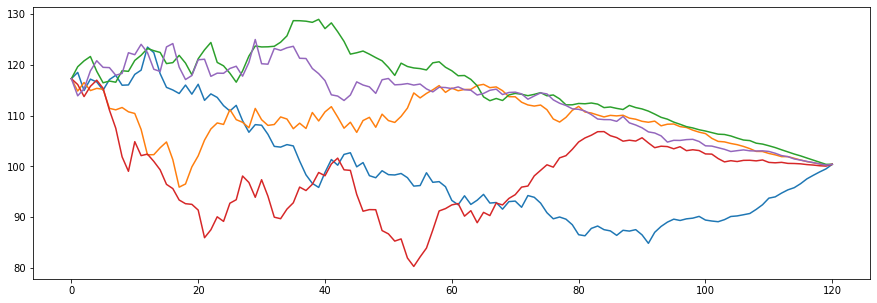

In [18]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [19]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,118.497,114.825,119.612,116.107,113.887
2,114.935,116.506,120.762,113.739,115.262
3,117.169,114.924,121.624,115.754,118.796
4,116.617,115.354,118.716,116.962,120.789
...,...,...,...,...,...
116,97.5569,100.951,101.656,100.363,100.987
117,98.2535,100.725,101.244,100.272,100.758
118,98.9131,100.501,100.831,100.135,100.498
119,99.5143,100.261,100.414,100.064,100.267


In [20]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [23]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)

1    0.035905
2    0.030981
3    0.028259
4    0.036271
dtype: float64

In [24]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,97.5569,100.951,101.656
117,98.2535,100.725,101.244
118,98.9131,100.501,100.831
119,99.5143,100.261,100.414
120,100.417,100.417,100.417


In [25]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,44.7025,147.268,200.685
117,46.3332,148.05,200.532
118,48.5774,149.986,200.464
119,52.0898,152.567,199.581
120,51.6231,157.713,199.03


In [26]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,143.095,133.47,146.127
2,133.968,138.056,149.652
3,140.079,134.163,152.464
4,138.865,135.514,144.586


In [27]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

In [29]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.035534,0.003961,-0.04072,3.408371,-0.001038,-0.000361,1.359817,-0.000233


In [30]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=.07, sigma=.15)
price_eq.shape

(121, 500)

In [32]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [33]:
rets_bonds.shape

(120, 500)

In [34]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
0,0.057667,0.005071,-0.234102,3.541002,-0.002207,-0.001506,5.309877,-0.000294
